In [2]:
import os
import sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../../../AutexysHost/source')
    
from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
mplu = dpu.mplu
from utilities import FET_Modeling as fet_model
#from procedures import Device_History as DH

import numpy as np

 === Figure S1 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6543557643890381)
Saving figures.
Figures saved. (Seconds elapsed: 0.3568837642669678)
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.009681224822998)
Saving figures.
Figures saved. (Seconds elapsed: 0.48628926277160645)
Plotting StaticBias plot.
Finished plotting StaticBias plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7878580093383789)
Saving figures.
Figures saved. (Seconds elapsed: 0.6041209697723389)


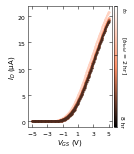

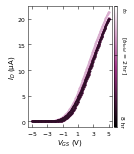

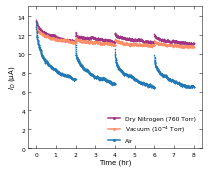

In [6]:
print(' === Figure S1 === ')

# -- Data Loading --

data_air_gs = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=48, maxExperiment=48)
data_air_sb = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'StaticBias.json', minExperiment=48, maxExperiment=48)

data_vacuum_gs = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=67, maxExperiment=67)
data_vacuum_sb = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'StaticBias.json', minExperiment=67, maxExperiment=67)

data_nitrogen_gs = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=74, maxExperiment=74)
data_nitrogen_sb = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'StaticBias.json', minExperiment=74, maxExperiment=74)

# -- Colors --

color_vacuum   = mplu.setupColors(None, 1, colorDefault=[], colorMapName='white_peach_black', colorMapStart=0.5, colorMapEnd=0.5)[0]
color_nitrogen = mplu.setupColors(None, 1, colorDefault=[], colorMapName='white_magenta_black', colorMapStart=0.5, colorMapEnd=0.5)[0]
color_air      = mplu.setupColors(None, 1, colorDefault=[], colorMapName='white_blue_black', colorMapStart=0.5, colorMapEnd=0.5)[0]
 

# -- Plots --

fig1, axes1 = dpu.makeDevicePlot('TransferCurve', data_vacuum_gs, data_vacuum_gs[0]['Identifiers'], mode_parameters={'publication_mode':True, 'figureSizeOverride':(2,2.25), 'enableColorBar':True, 'enableLegend':False, 'colorsOverride':('white_peach_black',0.8,0.15), 'xticks':[-5,-3,-1,1,3,5], })
#fig2, axes2 = dpu.makeDevicePlot('StaticBias'   , data_vacuum_sb, data_vacuum_sb[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':('white_peach_black',0.8,0.15)})
dpu.saveExternalPlot(fig1, "TransferCurve_vacuum")

fig3, axes3 = dpu.makeDevicePlot('TransferCurve', data_nitrogen_gs, data_nitrogen_gs[0]['Identifiers'], mode_parameters={'publication_mode':True, 'figureSizeOverride':(2,2.25), 'enableColorBar':True, 'enableLegend':False, 'colorsOverride':('white_magenta_black',0.8,0.15), 'xticks':[-5,-3,-1,1,3,5], })
#fig4, axes4 = dpu.makeDevicePlot('StaticBias'   , data_nitrogen_sb, data_nitrogen_sb[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':('white_magenta_black',0.8,0.15)})
dpu.saveExternalPlot(fig3, "TransferCurve_nitrogen")


# -- Combined Plot --

fig5, axes5 = dpu.makeDevicePlot('StaticBias'   , data_nitrogen_sb, data_nitrogen_sb[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':[color_nitrogen]*len(data_nitrogen_sb), 'ylim':{'top':15}, 'figureSizeOverride':(3,2.5)})
ax = axes5[0]
ax.lines[0].set_label('Dry Nitrogen (760 Torr)')

for deviceRun in data_vacuum_sb:
    deviceRun['Results']['timestamps'] = np.array(deviceRun['Results']['timestamps'])/3600
t0 = data_vacuum_sb[0]['Results']['timestamps'][0]
time_offsets = [deviceRun['Results']['timestamps'][0] - t0 for deviceRun in data_vacuum_sb]
for i in range(len(data_vacuum_sb)):
    line = mplu.plotStaticBias(ax, data_vacuum_sb[i], color_vacuum, time_offsets[i]) 
    line.set_label('Vacuum ($\\mathregular{10^{-4}}$ Torr)' if(i==0) else None)

for deviceRun in data_air_sb:
    deviceRun['Results']['timestamps'] = np.array(deviceRun['Results']['timestamps'])/3600
t0 = data_air_sb[0]['Results']['timestamps'][0]
time_offsets = [deviceRun['Results']['timestamps'][0] - t0 for deviceRun in data_air_sb]
for i in range(len(data_air_sb)):
    line = mplu.plotStaticBias(ax, data_air_sb[i], color_air, time_offsets[i])   
    line.set_label('Air' if(i==0) else None)
    
legend = ax.legend(loc="lower right", markerscale=2)
for line in legend.get_lines():
    line.set_linewidth(1.5)
    
dpu.saveExternalPlot(fig5, "Envionrment_Comparison")
    

Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7251200675964355)
Saving figures.
Figures saved. (Seconds elapsed: 0.4042067527770996)
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6855201721191406)
Saving figures.
Figures saved. (Seconds elapsed: 0.42836594581604004)
Plotting StaticBias plot.
Finished plotting StaticBias plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6742238998413086)
Saving figures.
Figures saved. (Seconds elapsed: 0.31377601623535156)


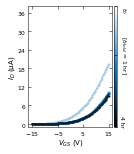

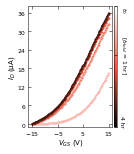

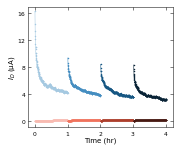

In [30]:
data_pos_gs = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM3/B/53-54', 'GateSweep.json', minExperiment=30, maxExperiment=30)
data_pos_sb = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM3/B/53-54', 'StaticBias.json', minExperiment=30, maxExperiment=30)

data_neg_gs = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM3/B/53-54', 'GateSweep.json', minExperiment=34, maxExperiment=34)
data_neg_sb = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM3/B/53-54', 'StaticBias.json', minExperiment=34, maxExperiment=34)

fig1, (ax1,) = dpu.makeDevicePlot('TransferCurve', data_pos_gs, data_pos_gs[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':True, 'publication_mode':True, 'colorsOverride':('white_blue_black',0.8,0.15), 'figureSizeOverride':(2,2.25), 'sweepDirection':'forward',  'yticks':[0,6,12,18,24,30,36], 'xticks':[-15,-5,5,15], 'ylim':{'bottom':-1,'top':38},})
dpu.saveExternalPlot(fig1, 'TransferCurve_pos_stress')

fig3, (ax3,) = dpu.makeDevicePlot('TransferCurve', data_neg_gs, data_neg_gs[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':True, 'publication_mode':True, 'colorsOverride':('white_red_black',0.8,0.15), 'figureSizeOverride':(2,2.25), 'sweepDirection':'forward', 'yticks':[0,6,12,18,24,30,36], 'xticks':[-15,-5,5,15], 'ylim':{'bottom':-1,'top':38},})
dpu.saveExternalPlot(fig1, 'TransferCurve_neg_stress')

fig2, axes2 = dpu.makeDevicePlot('StaticBias', data_pos_sb, data_pos_sb[0]['Identifiers'],     mode_parameters={'enableLegend':False, 'enableGradient':False, 'publication_mode':True, 'colorsOverride':('white_blue_black',0.8,0.15), 'figureSizeOverride':(2.6,2.20), 'yticks':[0,4,8,12,16], 'ylim':{'bottom':-1}})

#fig4, axes4 = dpu.makeDevicePlot('StaticBias', data_neg_sb, data_neg_sb[0]['Identifiers'],     mode_parameters={'enableLegend':False, 'enableGradient':False, 'publication_mode':True, 'colorsOverride':('white_red_black',0.8,0.15), 'figureSizeOverride':(2.6,2.20), 'yticks':[0,0.4,0.8,1.2,1.6], 'ylim':{'bottom':-0.05, 'top':1.6}, 'yscale':1e-6})
#dpu.saveExternalPlot(fig4, 'StaticBias_neg_stress')

colors_neg_bias =  mplu.setupColors(None, len(data_neg_sb), colorDefault=[], colorMapName='white_red_black', colorMapStart=0.8, colorMapEnd=0.15)

for deviceRun in data_neg_sb:
    deviceRun['Results']['timestamps'] = np.array(deviceRun['Results']['timestamps'])/3600
t0 = data_neg_sb[0]['Results']['timestamps'][0]
time_offsets = [deviceRun['Results']['timestamps'][0] - t0 for deviceRun in data_neg_sb]
for i in range(len(data_neg_sb)):
    line = mplu.plotStaticBias(axes2[0], data_neg_sb[i], colors_neg_bias[i], time_offsets[i])   
    
dpu.saveExternalPlot(fig2, 'StaticBias_pos_neg_stress')

Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.


No handles with labels found to put in legend.


Figures saved. (Seconds elapsed: 0.2734041213989258)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [0.397142270346951]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.


No handles with labels found to put in legend.


Figures saved. (Seconds elapsed: 0.25411391258239746)
Plotting BoxPlotTransconductance plot.
Extracted gm: [8.960756334890617e-07]
Finished plotting BoxPlotTransconductance plot.
Saving figures.


No handles with labels found to put in legend.


Figures saved. (Seconds elapsed: 0.4686398506164551)
Plotting BoxPlotSubthresholdSwing plot.
Extracted SS_mV_dec: [943.8592507296406]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.21789813041687012)
W_ch = 5 um


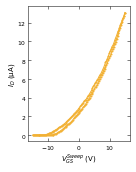

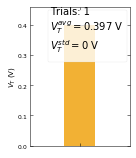

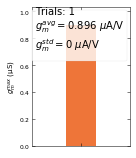

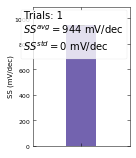

In [4]:
data_orig_D53_54 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM3/B/53-54', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)

figA7, axA7 = dpu.makeDevicePlot('TransferCurve', data_orig_D53_54, data_orig_D53_54[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})

fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig_D53_54)  , data_orig_D53_54[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig_D53_54)  , data_orig_D53_54[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_orig_D53_54)  , data_orig_D53_54[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

print('W_ch = 5 um')

Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.5061120986938477)
Plotting SubthresholdCurve plot.
Finished plotting SubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8109009265899658)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-1.0134042666646228, -1.0528265386752609, -1.8827293564383922, -1.617513715875767, -0.6706230424405704, -1.041064371616272]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5191149711608887)
Saving figures.
Figures saved. (Seconds elapsed: 0.20206594467163086)
Plotting BoxPlotTransconductance plot.
Extracted gm: [3.439222708371542e-06, 4.256431436834468e-06, 7.567674245817394e-06, 7.366333191485932e-06, 3.515138641590852e-06, 4.391277324728509e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.49878978729248047)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [349.61720669060486, 245.68168233323914, 229.17450811321467, 264.128377786878, 317.9547753105989, 310.63531670718777]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5943169593811035)
gm normalized: [1.380596584306187e-06, 2.142155746230164e-06, 2.166860529189568e-06, 2.4614308189267142e-06, 2.3521739844933897e-06, 1.1091123556234469e-06]
gm normalized mean: 1.9353883364615785e-06
gm normalized std: 5.061766806629478e-07
I_on normalized: [5.4, 8.25, 8.571428571428571, 10.666666666666666, 8.666666666666666, 4.25]
I_on normalized mean: 7.634126984126984
I_on normalized std: 2.158854163105062
Plotting StaticBias plot.
Finished plotting StaticBias plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8527500629425049)


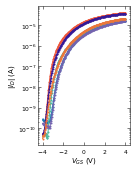

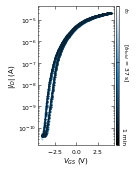

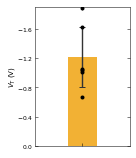

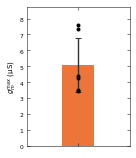

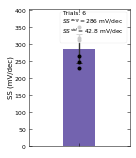

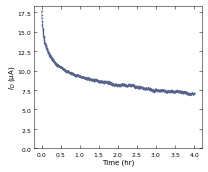

In [3]:
colors = ['#1f77b4', '#4FB99F', '#ed553b', '#351996', '#7363af', '#ee7539']

# Data -- Base Device
data_orig_D5_6 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/5-6', 'GateSweep.json', minExperiment=8, maxExperiment=8, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/24-25', 'GateSweep.json', minExperiment=33, maxExperiment=33, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D27_30 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/27-30', 'GateSweep.json', minExperiment=25, maxExperiment=25, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/28-29', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D31_32 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/31-32', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=4, maxRelativeIndex=4)
data_orig_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=0, maxRelativeIndex=0)
data_orig = [data_orig_D5_6[0], data_orig_D24_25[0], data_orig_D27_30[0], data_orig_D28_29[0], data_orig_D31_32[0], data_orig_D34_35[0]]

data_multiple_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=0, maxRelativeIndex=float('inf'))


fig4, ax4 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':colors})
#fig5, ax5 = dpu.makeChipPlot('ChipTransferCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'figureSizeOverride':(1.9,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':colors})

fig6, ax6 = dpu.makeDevicePlot('SubthresholdCurve', data_multiple_D34_35, data_multiple_D34_35[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':True, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[]})

fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig)            , data_orig[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False,  'sweepDirection':'forward', 'colorsOverride':[], 'figureSizeOverride':(2,2.3)})
axes7[0].set_ylim(top=0, bottom=-1.9)
axes7[0].invert_yaxis()
axes7[0].set_yticks([0,-0.4,-0.8,-1.2,-1.6])
dpu.saveExternalPlot(fig7, 'BoxPlotVT_editted')

fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig)            , data_orig[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False,  'sweepDirection':'forward', 'colorsOverride':[]})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_orig)            , data_orig[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward', 'colorsOverride':[]})

I_on_list = [13.5,16.5,30,32,13,17]
gm_list = [3.4514914607654678e-06, 4.284311492460328e-06, 7.584011852163488e-06, 7.384292456780143e-06, 3.5282609767400845e-06, 4.4364494224937875e-06]
W_ch = [2.5,2,3.5,3,1.5,4]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
Ion_width_normalized =[I_on_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))
print('I_on normalized: ' + str(Ion_width_normalized))
print('I_on normalized mean: ' + str(np.mean(Ion_width_normalized)))
print('I_on normalized std: ' + str(np.std(Ion_width_normalized)))

data_sb_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'StaticBias.json', minExperiment=37, maxExperiment=37)
fig8, axes8 = dpu.makeDevicePlot('StaticBias', (data_sb_D34_35), data_sb_D34_35[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':[]})



 === Figure S4 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.9553658962249756)
Saving figures.
Figures saved. (Seconds elapsed: 1.0238258838653564)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8025248050689697)
Saving figures.
Figures saved. (Seconds elapsed: 0.8575398921966553)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-5.152859408098439, -5.749257701451276, -5.306855906104352, -3.865069558235231, -4.110859738958696, -5.038198191791653, -4.0319582332510695, -5.072708184518963, -5.196313776462206, -4.833915502822316, -3.888258736990044, -4.918912519847113, -4.914752404921786]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5603759288787842)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [4.511150478977916e-06, 7.642066022584244e-06, 4.714820892626994e-06, 6.24590508873032e-06, 4.5771255523640125e-06, 8.55236595279767e-06, 4.916245211320446e-06, 6.274877265178218e-06, 4.530914452210566e-06, 8.205336195372741e-06, 4.494468139851401e-06, 2.4280192808270726e-06, 6.387220432930885e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.563730001449585)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [339.534933178274, 474.040736449567, 310.30663988126247, 300.01205542502197, 296.3611391059919, 310.3925798108735, 348.5708482850124, 296.95831841339066, 327.8006837221631, 294.57947703296605, 326.28671016357026, 300.1534714339485, 320.97677104643213]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6198039054870605)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-2.678111828717997, -2.813266397923262, -1.6797324499106434, -1.3805859936217098, -0.8736859890613005, -2.3667440538564373, -0.7869008804414679, -2.1509179163335514, -1.7830083243704937, -1.5747190103782076, -1.1342735790520224, -2.175969478680691, -1.908521982566908, -5.152859408098439, -5.749257701451276, -5.306855906104352, -3.865069558235231, -4.110859738958696, -5.038198191791653, -4.0319582332510695, -5.072708184518963, -5.196313776462206, -4.833915502822316, -3.888258736990044, -4.918912519847113, -4.914752404921786]
Finished plotting BoxPlot

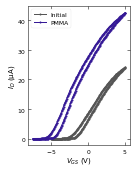

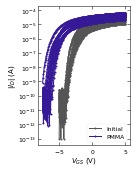

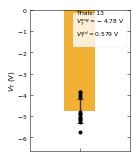

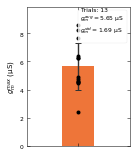

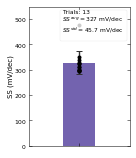

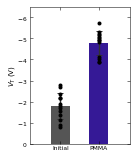

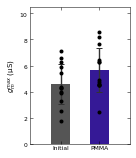

In [4]:
print(' === Figure S4 === ')

color_initial = '#555555'
color_PMMA = '#351996'

# Data -- PMMA
data_orig_D2_3 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/2-3', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D4_5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/4-5', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D6_7 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/6-7', 'GateSweep.json', minExperiment=8, maxExperiment=8, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D14_19 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/14-19', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/28-29', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D30_31 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/30-31', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/34-35', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D36_37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/36-37', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D40_41 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/40-41', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D43_44 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/43-44', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D47_50 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/47-50', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D48_49 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/48-49', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D62_63 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/62-63', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig = [data_orig_D2_3[0], data_orig_D4_5[0], data_orig_D6_7[0], data_orig_D14_19[0], data_orig_D28_29[0], data_orig_D30_31[0], data_orig_D34_35[0], data_orig_D36_37[0], data_orig_D40_41[0], data_orig_D43_44[0], data_orig_D47_50[0], data_orig_D48_49[0], data_orig_D62_63[0]]

data_PMMA_D2_3 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/2-3', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D4_5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/4-5', 'GateSweep.json', minExperiment=11, maxExperiment=11, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D6_7 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/6-7', 'GateSweep.json', minExperiment=13, maxExperiment=13, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D14_19 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/14-19', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/28-29', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D30_31 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/30-31', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/34-35', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D36_37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/36-37', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D40_41 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/40-41', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D43_44 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/43-44', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D47_50 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/47-50', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D48_49 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/48-49', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D62_63 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/62-63', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA = [data_PMMA_D2_3[0], data_PMMA_D4_5[0], data_PMMA_D6_7[0], data_PMMA_D14_19[0], data_PMMA_D28_29[0], data_PMMA_D30_31[0], data_PMMA_D34_35[0], data_PMMA_D36_37[0], data_PMMA_D40_41[0], data_PMMA_D43_44[0], data_PMMA_D47_50[0], data_PMMA_D48_49[0], data_PMMA_D62_63[0]]

## === Device Plots === 
#figA1, axesA1 = dpu.makeDevicePlot('TransferCurve', [data_orig_D2_3[0], data_PMMA_D2_3[0]], data_orig_D2_3[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA2, axesA2 = dpu.makeDevicePlot('TransferCurve', [data_orig_D4_5[0], data_PMMA_D4_5[0]], data_orig_D4_5[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA3, axesA3 = dpu.makeDevicePlot('TransferCurve', [data_orig_D6_7[0], data_PMMA_D6_7[0]], data_PMMA_D6_7[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA4, axesA4 = dpu.makeDevicePlot('TransferCurve', [data_orig_D14_19[0], data_PMMA_D14_19[0]], data_PMMA_D14_19[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA5, axesA5 = dpu.makeDevicePlot('TransferCurve', [data_orig_D28_29[0], data_PMMA_D28_29[0]], data_PMMA_D28_29[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA6, axesA6 = dpu.makeDevicePlot('TransferCurve', [data_orig_D30_31[0], data_PMMA_D30_31[0]], data_PMMA_D30_31[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA7, axesA7 = dpu.makeDevicePlot('TransferCurve', [data_orig_D34_35[0], data_PMMA_D34_35[0]], data_orig_D34_35[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
figA8, axesA8 = dpu.makeDevicePlot('TransferCurve', [data_orig_D36_37[0], data_PMMA_D36_37[0]], data_orig_D36_37[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA9, axesA9 = dpu.makeDevicePlot('TransferCurve', [data_orig_D40_41[0], data_PMMA_D40_41[0]], data_orig_D40_41[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA10, axesA10 = dpu.makeDevicePlot('TransferCurve', [data_orig_D43_44[0], data_PMMA_D43_44[0]], data_orig_D43_44[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA11, axesA11 = dpu.makeDevicePlot('TransferCurve', [data_orig_D47_50[0], data_PMMA_D47_50[0]], data_orig_D47_50[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA12, axesA12 = dpu.makeDevicePlot('TransferCurve', [data_orig_D48_49[0], data_PMMA_D48_49[0]], data_orig_D48_49[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA13, axesA13 = dpu.makeDevicePlot('TransferCurve', [data_orig_D62_63[0], data_PMMA_D62_63[0]], data_orig_D62_63[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})

# Add legend
ax = axesA8[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('PMMA')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA8, 'PMMA_typical_device', mode_parameters={'publication_mode':True})

## === Chip Plots ===
#fig1, axesB1 = dpu.makeChipPlot('ChipTransferCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#fig2, axesB2 = dpu.makeChipPlot('ChipTransferCurve', data_PMMA[0]['Identifiers'], recentRunChipHistory=data_PMMA, specificRunChipHistory=data_PMMA, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#fig3, axesB3 = dpu.makeChipPlot('ChipTransferCurve', data_PMMA[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_PMMA], specificRunChipHistory=[*data_orig, *data_PMMA], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#fig4, axesB4 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#fig5, axesB5 = dpu.makeChipPlot('ChipSubthresholdCurve', data_PMMA[0]['Identifiers'], recentRunChipHistory=data_PMMA, specificRunChipHistory=data_PMMA, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
fig6, axes6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_PMMA[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_PMMA], specificRunChipHistory=[*data_orig, *data_PMMA], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_PMMA]*len(data_orig)})

# Add legend
ax = axes6[0]
ax.lines[0].set_label('Initial')
ax.lines[13].set_label('PMMA')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(fig6, 'PMMA_all_devices', mode_parameters={'publication_mode':True})

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_PMMA)            , data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_PMMA)            , data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_PMMA)            , data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_PMMA), data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('PMMA',len(data_PMMA))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_PMMA]})
axes10[0].set_ylim(top=0, bottom=-6.5)
axes10[0].invert_yaxis()
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage_PMMA')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_PMMA), data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('PMMA',len(data_PMMA))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_PMMA], 'ylim':{'top':10.5}})
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance_PMMA')

## === Normalized gm Extraction ===
I_on_list = [20,30,20,30,20,35,18,25,20,35,16,10,25]
gm_list = [4.530694836296809e-06, 7.650799478501812e-06, 4.718572501281726e-06, 6.255194071737292e-06, 4.580258858600791e-06, 8.591417087974264e-06, 4.921986269743464e-06, 6.310725518744782e-06, 4.53839849895733e-06, 8.234989284098782e-06, 4.497913764621729e-06, 2.4294435853623086e-06, 6.3982867250592485e-06]
W_ch = [2.5,4,3.5,3.5,2,4,3.5,3,4,3.5,2,2,3.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
Ion_width_normalized =[I_on_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))
print('I_on normalized: ' + str(Ion_width_normalized))
print('I_on normalized mean: ' + str(np.mean(Ion_width_normalized)))
print('I_on normalized std: ' + str(np.std(Ion_width_normalized)))

 === Figure S5 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.0725901126861572)
Saving figures.
Figures saved. (Seconds elapsed: 0.6596317291259766)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8603880405426025)
Saving figures.
Figures saved. (Seconds elapsed: 0.571281909942627)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-11.168485811919147, -14.378253934806693, -13.51706028447339, -4.308631544888541, -2.39943498996063, -9.980312370665152, -7.978947130619814]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5988409519195557)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [3.1822672738590314e-06, 2.584494299010371e-06, 2.7852155759558363e-06, 4.88612316333397e-06, 4.477424551059077e-06, 4.7480950248411e-06, 6.609330905497101e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6156680583953857)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [15454.08980960059, 22819.403145357148, 20847.87830534159, 5583.158335913486, 4361.7838300466, 12699.60352719334, 8092.767928197441]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7292909622192383)
Plotting BoxPlotThresholdVoltage plot.


/Users/jaydoherty/Documents/myWorkspaces/Research/Autexys/AutexysHost/source/utilities/FET_Modeling.py:261: RuntimeWarning: divide by zero encountered in log10
  startIndex, endIndex = _find_steepest_region(V_GS_data, np.log10(np.abs(I_D_data)), region_length)


Extracted VT: [-2.3394466317055156, -1.7307532638575558, -1.7331048399262565, -0.919168710300477, -0.07466588308267076, -1.9782869614989318, -1.6221572659189993, -11.168485811919147, -14.378253934806693, -13.51706028447339, -4.308631544888541, -2.39943498996063, -9.980312370665152, -7.978947130619814]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.552685022354126)
Saving figures.
Figures saved. (Seconds elapsed: 0.3196089267730713)
Plotting BoxPlotTransconductance plot.
Extracted gm: [5.6473202138430515e-06, 2.7408183909007375e-06, 2.689307693753332e-06, 4.998176948908888e-06, 4.214736777415111e-06, 5.551129637035056e-06, 5.8869017552141105e-06, 3.1822672738590314e-06, 2.584494299010371e-06, 2.7852155759558363e-06, 4.88612316333397e-06, 4.477424551059077e-06, 4.7480950248411e-06, 6.609330905497101e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5172457695007324)
Saving figures.
F

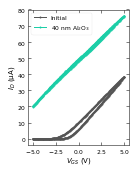

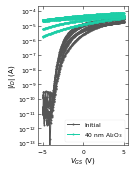

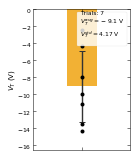

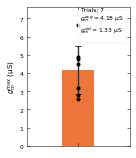

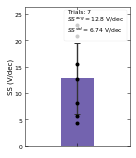

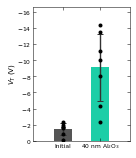

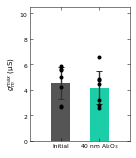

In [4]:
print(' === Figure S5 === ')

color_initial = '#555555'
color_ALD = '#1CCEA7'

# Data -- 40 nm Al2O3
data_orig_D1_2 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/1-2', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D3_4 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/3-4', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D3_6 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/3-6', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D7_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/7-11', 'GateSweep.json', minExperiment=26, maxExperiment=26, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/24-25', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/28-29', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D43_44 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/43-44', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_orig = [data_orig_D1_2[0], data_orig_D3_4[0], data_orig_D3_6[0], data_orig_D7_11[0], data_orig_D24_25[0], data_orig_D28_29[0], data_orig_D43_44[0]]

data_ALD_D1_2 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/1-2', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D3_4 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/3-4', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D3_6 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/3-6', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D7_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/7-11', 'GateSweep.json', minExperiment=43, maxExperiment=43, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD2_D7_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/7-11', 'GateSweep.json', minExperiment=40, maxExperiment=40, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/24-25', 'GateSweep.json', minExperiment=10, maxExperiment=10, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/28-29', 'GateSweep.json', minExperiment=15, maxExperiment=15, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D43_44 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/43-44', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD = [data_ALD_D1_2[0], data_ALD_D3_4[0], data_ALD_D3_6[0], data_ALD_D7_11[0], data_ALD_D24_25[0], data_ALD_D28_29[0], data_ALD_D43_44[0]]

## === Device Plots ===
#figA1, axesA1 = dpu.makeDevicePlot('TransferCurve', [data_orig_D1_2[0], data_ALD_D1_2[0]], data_orig_D1_2[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA2, axesA2 = dpu.makeDevicePlot('TransferCurve', [data_orig_D3_4[0], data_ALD_D3_4[0]], data_orig_D3_4[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA3, axesA3 = dpu.makeDevicePlot('TransferCurve', [data_orig_D3_6[0], data_ALD_D3_6[0]], data_orig_D3_6[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA4, axesA4 = dpu.makeDevicePlot('TransferCurve', [data_orig_D7_11[0], data_ALD_D7_11[0]], data_orig_D7_11[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA5, axesA5 = dpu.makeDevicePlot('TransferCurve', [data_orig_D24_25[0], data_ALD_D24_25[0]], data_orig_D24_25[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA6, axesA6 = dpu.makeDevicePlot('TransferCurve', [data_orig_D28_29[0], data_ALD_D28_29[0]], data_orig_D28_29[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
figA7, axesA7 = dpu.makeDevicePlot('TransferCurve', [data_orig_D43_44[0], data_ALD_D43_44[0]], data_orig_D43_44[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA8, axesA8 = dpu.makeDevicePlot('TransferCurve', [data_orig_D7_11[0], data_ALD2_D7_11[0]], data_orig_D7_11[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})

# Add legend
ax = axesA7[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('40 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA7, 'Al2O3_40nm_typical_device')

# === Chip Plots ===
#figB1, axesB1 = dpu.makeChipPlot('ChipTransferCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB2, axesB2 = dpu.makeChipPlot('ChipTransferCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=data_ALD, specificRunChipHistory=data_ALD, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB3, axesB3 = dpu.makeChipPlot('ChipTransferCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_ALD], specificRunChipHistory=[*data_orig, *data_ALD], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB4, axesB4 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB5, axesB5 = dpu.makeChipPlot('ChipSubthresholdCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=data_ALD, specificRunChipHistory=data_ALD, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_ALD], specificRunChipHistory=[*data_orig, *data_ALD], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_ALD]*len(data_orig)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[7].set_label('40 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(figB6, 'Al2O3_40nm_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('40 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD]})
axes10[0].set_ylim(top=0)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage_Al2O3_40nm')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('40 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD], 'ylim':{'top':10.5}})
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance_Al2O3_40nm')

# === Normalized gm Extraction ===
I_on_list = [13,10,10,20,15,18,25]
gm_list = [3.1855105657748343e-06, 2.615254787614642e-06, 2.8202205406431696e-06, 4.89599465361688e-06, 4.50757891915143e-06, 4.77376598007596e-06, 6.63651461360121e-06]
W_ch = [4.5,3.5,3,3,3,4.5,3.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
Ion_width_normalized =[I_on_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))
print('I_on normalized: ' + str(Ion_width_normalized))
print('I_on normalized mean: ' + str(np.mean(Ion_width_normalized)))
print('I_on normalized std: ' + str(np.std(Ion_width_normalized)))

 === Figure S6 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6058230400085449)
Saving figures.
Figures saved. (Seconds elapsed: 0.5379886627197266)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.898629903793335)
Saving figures.
Figures saved. (Seconds elapsed: 0.5970957279205322)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-10.684646850653863, -13.304933608802871, -5.040465607044363, -12.29309267857135, -5.54610674756004, -10.619245822894024, -3.6819705542126924, -5.281657847024586, -6.794544753380893, -6.630808710541365, -10.709081807377164, -6.211343626510858, -13.255503114742718]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5864078998565674)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [4.044372580437142e-06, 3.7731349945870887e-06, 3.5297150940406743e-06, 4.799176361383326e-06, 8.84412948162171e-06, 3.0496439736113707e-06, 6.956288317204463e-06, 3.7029076922332785e-06, 4.916352901815556e-06, 5.576658604031448e-06, 6.070056148331454e-06, 8.29920212034405e-06, 4.571186901169157e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.531055212020874)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [10405.350703517592, 20140.296549524886, 1965.9130105880904, 12834.249283728155, 993.2810111835187, 9056.71348196836, 746.6623457968063, 786.9475911609093, 2721.298089297704, 1806.8154887145465, 9050.130680883709, 985.5764325304729, 14924.423205917135]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5186841487884521)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-2.365880797183596, -2.6826756629987583, -2.5158079049699613, -3.2681838819373175, -0.7660788779828552, -1.981236852619504, -2.65299830511945, -2.5555492542977287, -2.4519579683221884, -2.4137583358435313, -3.6474096247652903, -2.0614503713491885, -2.5721224178986355, -10.684646850653863, -13.304933608802871, -5.040465607044363, -12.29309267857135, -5.54610674756004, -10.619245822894024, -3.6819705542126924, -5.281657847024586, -6.794544753380893, -6.630808710541365, -10.709081807377164, -6.211343626510858, -13.255503114742718]
Finished plotting Bo

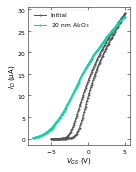

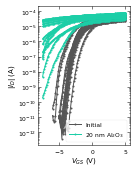

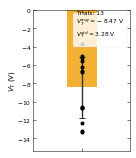

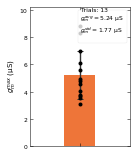

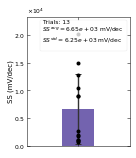

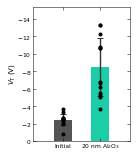

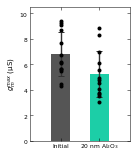

In [2]:
print(' === Figure S6 === ')

color_initial = '#555555'
color_ALD = '#1CCEA7'

# Data -- 20 nm ALD Al2O3
data_orig_D4_5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/4-5', 'GateSweep.json',     minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D10_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/10-11', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D20_21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/20-21', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/24-25', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D27_30 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/27-30', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D31_32 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/31-32', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D33_34 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/33-34', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D42_43 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/42-43', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D44_45 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/44-45', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D50_51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/50-51', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D52_53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/52-53', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D59_62 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/59-62', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D63_64 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/63-64', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig = [data_orig_D4_5[0], data_orig_D10_11[0], data_orig_D20_21[0], data_orig_D24_25[0], data_orig_D27_30[0], data_orig_D31_32[0], data_orig_D33_34[0], data_orig_D42_43[0], data_orig_D44_45[0], data_orig_D50_51[0], data_orig_D52_53[0], data_orig_D59_62[0], data_orig_D63_64[0]]

data_ALD_D4_5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/4-5', 'GateSweep.json',     minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D10_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/10-11', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D20_21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/20-21', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/24-25', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D27_30 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/27-30', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D31_32 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/31-32', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D33_34 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/33-34', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D42_43 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/42-43', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D44_45 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/44-45', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D50_51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/50-51', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D52_53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/52-53', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D59_62 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/59-62', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D63_64 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/63-64', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD = [data_ALD_D4_5[0], data_ALD_D10_11[0], data_ALD_D20_21[0], data_ALD_D24_25[0], data_ALD_D27_30[0], data_ALD_D31_32[0], data_ALD_D33_34[0], data_ALD_D42_43[0], data_ALD_D44_45[0], data_ALD_D50_51[0], data_ALD_D52_53[0], data_ALD_D59_62[0], data_ALD_D63_64[0]]

## === Device Plots ===
#figA1, axesA1 = dpu.makeDevicePlot('TransferCurve', [data_orig_D4_5[0], data_ALD_D4_5[0]], data_orig_D4_5[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA2, axesA2 = dpu.makeDevicePlot('TransferCurve', [data_orig_D10_11[0], data_ALD_D10_11[0]], data_orig_D10_11[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
figA3, axesA3 = dpu.makeDevicePlot('TransferCurve', [data_orig_D20_21[0], data_ALD_D20_21[0]], data_orig_D20_21[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA4, axesA4 = dpu.makeDevicePlot('TransferCurve', [data_orig_D24_25[0], data_ALD_D24_25[0]], data_orig_D24_25[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA5, axesA5 = dpu.makeDevicePlot('TransferCurve', [data_orig_D27_30[0], data_ALD_D27_30[0]], data_orig_D27_30[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA6, axesA6 = dpu.makeDevicePlot('TransferCurve', [data_orig_D31_32[0], data_ALD_D31_32[0]], data_orig_D31_32[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA7, axesA7 = dpu.makeDevicePlot('TransferCurve', [data_orig_D33_34[0], data_ALD_D33_34[0]], data_orig_D33_34[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA8, axesA8 = dpu.makeDevicePlot('TransferCurve', [data_orig_D42_43[0], data_ALD_D42_43[0]], data_orig_D42_43[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA9, axesA9 = dpu.makeDevicePlot('TransferCurve', [data_orig_D44_45[0], data_ALD_D44_45[0]], data_orig_D44_45[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA10, axesA10 = dpu.makeDevicePlot('TransferCurve', [data_orig_D50_51[0], data_ALD_D50_51[0]], data_orig_D50_51[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA11, axesA11 = dpu.makeDevicePlot('TransferCurve', [data_orig_D52_53[0], data_ALD_D52_53[0]], data_orig_D52_53[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA12, axesA12 = dpu.makeDevicePlot('TransferCurve', [data_orig_D59_62[0], data_ALD_D59_62[0]], data_orig_D59_62[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA13, axesA13 = dpu.makeDevicePlot('TransferCurve', [data_orig_D63_64[0], data_ALD_D63_64[0]], data_orig_D63_64[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})

# Add legend
ax = axesA3[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('20 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA3, 'Al2O3_20nm_typical_device')

## === Chip Plots ===
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_ALD], specificRunChipHistory=[*data_orig, *data_ALD], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_ALD]*len(data_orig)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[13].set_label('20 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(figB6, 'Al2O3_20nm_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('20 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD]})
axes10[0].set_ylim(top=0)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage_Al2O3_20nm')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('20 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD], 'ylim':{'top':10.5}})
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance_Al2O3_20nm')


## === Normalized gm Extraction ===
I_on_list = [18,15,15,20,40,12,23,15,20,23,22,33,18]
gm_list = [4.077133978328626e-06, 3.791064507962481e-06, 3.4503328825830575e-06, 4.843182232011631e-06, 8.871144786453394e-06, 3.0525834747091946e-06, 7.027242000562041e-06, 3.7282295733646246e-06, 4.938886416998175e-06, 5.602449244668966e-06, 5.8241560192285954e-06, 8.08818412896319e-06, 4.6486863283224625e-06]
W_ch = [2,2.5,2,3,4,2,4,1.5,2,2,4,4,3.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
Ion_width_normalized =[I_on_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))
print('I_on normalized: ' + str(Ion_width_normalized))
print('I_on normalized mean: ' + str(np.mean(Ion_width_normalized)))
print('I_on normalized std: ' + str(np.std(Ion_width_normalized)))

 === Figure S7 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.2364599704742432)
Saving figures.
Figures saved. (Seconds elapsed: 0.4355509281158447)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.9085440635681152)
Saving figures.
Figures saved. (Seconds elapsed: 0.6191716194152832)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-1.6599735592759872, -2.3297129260491167, -2.6137096650037, -2.154753725044742, -1.0350793608019637, -1.91249425242515, -2.6393118442784695, -2.2750833641717128, -1.27943017905674, -1.450392690384405, -3.0620893182013527, -1.4597220796972348, -0.32858514489661117, -2.1374558935542516, -1.0637104808078346, -0.9374979780176657, -2.053002708672029]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5844299793243408)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [7.371836531113e-06, 9.08250807721016e-06, 8.318297744156477e-06, 5.563035223482512e-06, 4.53644345746322e-06, 5.195607071850463e-06, 7.675260230565e-06, 9.214251445528665e-06, 6.771812041494703e-06, 4.693216849478126e-06, 3.445691781905785e-06, 3.054271865138134e-06, 3.997102674419353e-06, 4.727598738426365e-06, 5.553708844601221e-06, 4.489560241324302e-06, 4.537866104869389e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5573482513427734)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [288.6375063269059, 281.3337735558925, 489.7958289617433, 260.7955511853649, 324.69805729047164, 292.45301045953863, 271.019464039457, 429.28713304502884, 393.90832811715677, 408.7698344944343, 1867.645950185469, 296.4781920468269, 426.33720446019026, 322.83088173806533, 347.89426852336635, 321.0741408587124, 559.5402882035651]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.547950267791748)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-3.0086407989931443, -3.275335960965779, -3.6875668374089834, -3.110831576182262, -2.9347629825176726, -3.623239677660447, -2.991199160606411, -3.064580427164904, -2.7816067914079836, -2.947835137604938, -3.582677032907281, -2.868104641558917, -3.2953403477414107, -2.7875063974555316, -3.8279005537524666, -2.0815828860360637, -3.258616800286044, -1.6599735592759872, -2.3297129260491167, -2.6137096650037, -2.154753725044742, -1.0350793608019637, -1.91249425242515, -2.6393118

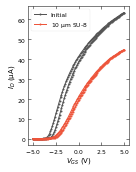

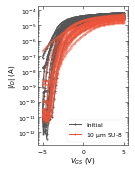

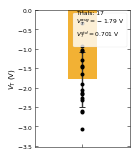

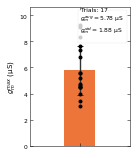

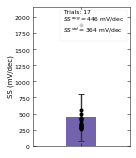

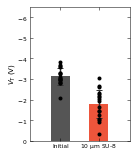

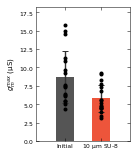

In [3]:
print(' === Figure S7 === ')

color_initial = '#555555'
color_SU8 = '#ed553b' #'#b00000'  #'#f2b134'

# Data -- SU-8
data_orig_D1_32  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/1-32', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D3_6   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/3-6',  'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D4_5   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/4-5',  'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D11_12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/11-12', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D13_14 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/13-14', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D15_18 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/15-18', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D20_21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/20-21', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/28-29', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D33_46 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/33-46', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D36_37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/36-37', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D39_42 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/39-42', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D44_45 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/44-45', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D48_49 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/48-49', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D50_51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/50-51', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D52_53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/52-53', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D54_55 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/54-55', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D60_61 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/60-61', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig = [data_orig_D1_32[0], data_orig_D3_6[0], data_orig_D4_5[0], data_orig_D11_12[0], data_orig_D13_14[0], data_orig_D15_18[0], data_orig_D20_21[0], data_orig_D28_29[0], data_orig_D33_46[0], data_orig_D36_37[0], data_orig_D39_42[0], data_orig_D44_45[0], data_orig_D48_49[0], data_orig_D50_51[0], data_orig_D52_53[0], data_orig_D54_55[0], data_orig_D60_61[0]]

data_SU8_D1_32  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/1-32', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D3_6   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/3-6',  'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D4_5   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/4-5',  'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D11_12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/11-12', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D13_14 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/13-14', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D15_18 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/15-18', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D20_21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/20-21', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/28-29', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D33_46 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/33-46', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_SU8_D36_37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/36-37', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D39_42 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/39-42', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D44_45 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/44-45', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D48_49 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/48-49', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_SU8_D50_51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/50-51', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D52_53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/52-53', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D54_55 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/54-55', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D60_61 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/60-61', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8 = [data_SU8_D1_32[0], data_SU8_D3_6[0], data_SU8_D4_5[0], data_SU8_D11_12[0], data_SU8_D13_14[0], data_SU8_D15_18[0], data_SU8_D20_21[0], data_SU8_D28_29[0], data_SU8_D33_46[0], data_SU8_D36_37[0], data_SU8_D39_42[0], data_SU8_D44_45[0], data_SU8_D48_49[0], data_SU8_D50_51[0], data_SU8_D52_53[0], data_SU8_D54_55[0], data_SU8_D60_61[0]]

## === Device Plots ===
#figA1, axesA1   = dpu.makeDevicePlot('TransferCurve', [data_orig_D1_32[0],  data_SU8_D1_32[0]],  data_orig_D1_32[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
figA2, axesA2   = dpu.makeDevicePlot('TransferCurve', [data_orig_D3_6[0],   data_SU8_D3_6[0]],   data_orig_D3_6[0]['Identifiers'],   mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA3, axesA3   = dpu.makeDevicePlot('TransferCurve', [data_orig_D4_5[0],   data_SU8_D4_5[0]],   data_orig_D4_5[0]['Identifiers'],   mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA4, axesA4   = dpu.makeDevicePlot('TransferCurve', [data_orig_D11_12[0], data_SU8_D11_12[0]], data_orig_D11_12[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA5, axesA5   = dpu.makeDevicePlot('TransferCurve', [data_orig_D13_14[0], data_SU8_D13_14[0]], data_orig_D13_14[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA6, axesA6   = dpu.makeDevicePlot('TransferCurve', [data_orig_D15_18[0], data_SU8_D15_18[0]], data_orig_D15_18[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA7, axesA7   = dpu.makeDevicePlot('TransferCurve', [data_orig_D20_21[0], data_SU8_D20_21[0]], data_orig_D20_21[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA8, axesA8   = dpu.makeDevicePlot('TransferCurve', [data_orig_D28_29[0], data_SU8_D28_29[0]], data_orig_D28_29[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA9, axesA9   = dpu.makeDevicePlot('TransferCurve', [data_orig_D33_46[0], data_SU8_D33_46[0]], data_orig_D33_46[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA10, axesA10 = dpu.makeDevicePlot('TransferCurve', [data_orig_D36_37[0], data_SU8_D36_37[0]], data_orig_D36_37[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA11, axesA11 = dpu.makeDevicePlot('TransferCurve', [data_orig_D39_42[0], data_SU8_D39_42[0]], data_orig_D39_42[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA12, axesA12 = dpu.makeDevicePlot('TransferCurve', [data_orig_D44_45[0], data_SU8_D44_45[0]], data_orig_D44_45[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA13, axesA13 = dpu.makeDevicePlot('TransferCurve', [data_orig_D48_49[0], data_SU8_D48_49[0]], data_orig_D48_49[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA14, axesA14 = dpu.makeDevicePlot('TransferCurve', [data_orig_D50_51[0], data_SU8_D50_51[0]], data_orig_D50_51[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA15, axesA15 = dpu.makeDevicePlot('TransferCurve', [data_orig_D52_53[0], data_SU8_D52_53[0]], data_orig_D52_53[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA16, axesA16 = dpu.makeDevicePlot('TransferCurve', [data_orig_D54_55[0], data_SU8_D54_55[0]], data_orig_D54_55[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA17, axesA17 = dpu.makeDevicePlot('TransferCurve', [data_orig_D60_61[0], data_SU8_D60_61[0]], data_orig_D60_61[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})

# Add legend
ax = axesA2[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('10 $\mathregular{\\mu}$m SU-8')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA2, 'SU8_typical_device')

## === Chip Plots ===
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_SU8], specificRunChipHistory=[*data_orig, *data_SU8], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_SU8]*len(data_SU8)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[len(data_orig)].set_label('10 $\mathregular{\\mu}$m SU-8')
ax.legend(loc = 'lower right')
[ax.lines[i].set_alpha(0.5) for i in range(len(data_orig),len(data_orig) + len(data_SU8))]
dpu.saveExternalPlot(figB6, 'SU8_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_SU8)            , data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_SU8)            , data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_SU8)            , data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_SU8), data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('10 $\mathregular{\\mu}$m SU-8',len(data_SU8))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_SU8]})
#axes10[0].set_yticks([-4,-3,-2,-1,0])
axes10[0].set_ylim(top=0, bottom=-6.5)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage_SU8')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_SU8), data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('10 $\mathregular{\\mu}$m SU-8',len(data_SU8))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_SU8]})
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance_SU8')

## === Normalized gm Extraction ===
I_on_list = [25,32,30,23,18,20,30,35,27,18,14,11,15,17,22,17.5,17]
gm_list = [7.447502675287559e-06, 9.184149741165902e-06, 8.423262954286189e-06, 5.589243615302851e-06, 4.591955141515177e-06, 5.203165841808853e-06, 7.732876202914472e-06, 9.238896012251577e-06, 6.827105089036407e-06, 4.711272182923589e-06, 3.508271554765858e-06, 3.081589742067724e-06, 4.025122557070567e-06, 4.7536144614295155e-06, 5.5728770451980745e-06, 4.515025430502621e-06, 4.555134554850747e-06]
W_ch = [3.5,4.25,4,2.5,3,2,3.5,5,3.5,2.5,3,2.5,2,4,2.75,1.75,3]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
Ion_width_normalized =[I_on_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))
print('I_on normalized: ' + str(Ion_width_normalized))
print('I_on normalized mean: ' + str(np.mean(Ion_width_normalized)))
print('I_on normalized std: ' + str(np.std(Ion_width_normalized)))

 === Figure S8 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.001065969467163)
Saving figures.
Figures saved. (Seconds elapsed: 0.6828579902648926)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.96586012840271)
Saving figures.
Figures saved. (Seconds elapsed: 0.6000409126281738)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-1.4922514000984324, -1.2802232223937648, 0.858846077815378, 0.09479193864882286, -1.446398841691927, -0.23049500805442397, -0.23295496287376186, -1.0080980429720978, -1.0635043386834557, -0.1990438318588896, 1.0110496979456063, -1.4869473303300624, -1.5841080630972988, -1.213697002320533, 0.026901828868365268, -0.283345789839574, -1.6487804589866084, -0.44448373147952935, -1.721147264081478]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5712199211120605)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [2.6037612576349007e-06, 5.565097180309217e-06, 5.6406945320019915e-06, 4.46569746319209e-06, 1.7879252165197312e-06, 1.2110830993957219e-06, 3.5299187462941143e-06, 3.8631896178118434e-06, 2.1684785930152765e-06, 3.698788015863573e-06, 6.118086699500046e-06, 1.9163098550407813e-06, 4.231773880895447e-06, 1.4040937303557925e-06, 5.0361666390250645e-06, 3.0088537813729825e-06, 2.4326304611196016e-06, 3.687915803791648e-06, 1.2167938893201652e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5957789421081543)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [434.58452440258793, 380.6575216622432, 411.85443457071557, 388.8945246812575, 347.9905979920381, 388.9816250599368, 331.3017933046342, 332.7761453411259, 324.32710799198674, 348.6517101201356, 415.6234464359398, 409.9971097769426, 311.078211348894, 332.54876983503254, 355.82705441858775, 371.9324898317626, 330.1662974318498, 374.1833746057012, 420.01099283839653]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5600171089172363)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-2.857391931472453, -2.7692846405630647, -2.1068849571838264, -2.4366781147382253, -2.8784097236721617, -1.6620373130081603, -2.3605146953170997, -2.900881305786589, -2.6462174082913354, -2.8960817758897774, -2.4850856568782516, -2.582713728776279, -2.258844225105832, -2.6866522855299775, -2.5407643633109664, -1.8894102702693343, -2.4228814192731494, -2.0650444454804417, -2.5505362659467585, -1.4922514000984324, -1.2802232223937648, 0.8

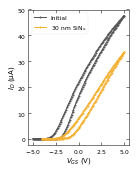

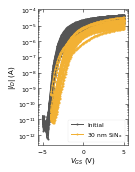

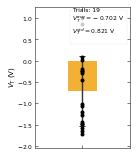

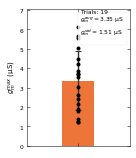

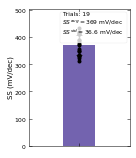

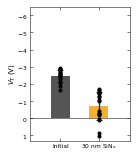

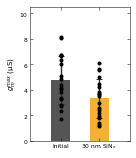

In [4]:
print(' === Figure S8 === ')

color_initial = '#555555'
color_SiNx = '#f2b134' #'#ee7539'

# Data -- SiNx
data_orig_D2_13   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/2-13',  'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D3_4    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',   'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D5_6    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/5-6',   'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D7_8    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/7-8',   'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D9_10   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/9-10',  'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D11_12  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/11-12', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D14_15  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/14-15', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D16_17  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/16-17', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D18_19  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/18-19', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D20_27  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/20-27', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D23_24  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/23-24', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D29_30  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/29-30', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D37_38  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/37-38', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D44_45  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/44-45', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
#data_orig_D50_51  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/50-51', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D52_53  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/52-53', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D55_58  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/55-58', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D56_57  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/56-57', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D59_62  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/59-62', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D60_61  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/60-61', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig = [data_orig_D2_13[0], data_orig_D3_4[0], data_orig_D5_6[0], data_orig_D7_8[0], data_orig_D9_10[0], data_orig_D11_12[0], data_orig_D14_15[0], data_orig_D16_17[0], data_orig_D18_19[0], data_orig_D20_27[0], data_orig_D23_24[0], data_orig_D29_30[0], data_orig_D37_38[0], data_orig_D44_45[0], data_orig_D52_53[0], data_orig_D55_58[0], data_orig_D56_57[0], data_orig_D59_62[0], data_orig_D60_61[0]]

data_SiN_D2_13   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/2-13',  'GateSweep.json',  minExperiment=9, maxExperiment=9, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D3_4    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',   'GateSweep.json',  minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D5_6    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/5-6',   'GateSweep.json',  minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D7_8    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/7-8',   'GateSweep.json',  minExperiment=6, maxExperiment=6, minRelativeIndex=1, maxRelativeIndex=1)
data_SiN_D9_10   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/9-10',  'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D11_12  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/11-12', 'GateSweep.json',  minExperiment=5, maxExperiment=5, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D14_15  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/14-15', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D16_17  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/16-17', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D18_19  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/18-19', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D20_27  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/20-27', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D23_24  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/23-24', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D29_30  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/29-30', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D37_38  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/37-38', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D44_45  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/44-45', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=1, maxRelativeIndex=1)
#data_SiN_D50_51  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/50-51', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D52_53  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/52-53', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=1, maxRelativeIndex=1)
data_SiN_D55_58  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/55-58', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D56_57  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/56-57', 'GateSweep.json',  minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D59_62  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/59-62', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D60_61  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/60-61', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiNx = [data_SiN_D2_13[0], data_SiN_D3_4[0], data_SiN_D5_6[0], data_SiN_D7_8[0], data_SiN_D9_10[0], data_SiN_D11_12[0], data_SiN_D14_15[0], data_SiN_D16_17[0], data_SiN_D18_19[0], data_SiN_D20_27[0], data_SiN_D23_24[0], data_SiN_D29_30[0], data_SiN_D37_38[0], data_SiN_D44_45[0], data_SiN_D52_53[0], data_SiN_D55_58[0], data_SiN_D56_57[0], data_SiN_D59_62[0], data_SiN_D60_61[0]]

## === Device Plots ===
#figA1, axesA1   = dpu.makeDevicePlot('TransferCurve', [data_orig_D2_13[0],   data_SiN_D2_13[0]],   data_orig_D2_13[0]['Identifiers'],   mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
figA2, axesA2   = dpu.makeDevicePlot('TransferCurve', [data_orig_D3_4[0],    data_SiN_D3_4[0]],    data_orig_D3_4[0]['Identifiers'],    mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA3, axesA3   = dpu.makeDevicePlot('TransferCurve', [data_orig_D5_6[0],    data_SiN_D5_6[0]],    data_orig_D5_6[0]['Identifiers'],    mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA4, axesA4   = dpu.makeDevicePlot('TransferCurve', [data_orig_D7_8[0],    data_SiN_D7_8[0]],    data_orig_D7_8[0]['Identifiers'],    mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA5, axesA5   = dpu.makeDevicePlot('TransferCurve', [data_orig_D9_10[0],   data_SiN_D9_10[0]],   data_orig_D9_10[0]['Identifiers'],   mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA6, axesA6   = dpu.makeDevicePlot('TransferCurve', [data_orig_D11_12[0],  data_SiN_D11_12[0]],  data_orig_D11_12[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA7, axesA7   = dpu.makeDevicePlot('TransferCurve', [data_orig_D14_15[0],  data_SiN_D14_15[0]],  data_orig_D14_15[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA8, axesA8   = dpu.makeDevicePlot('TransferCurve', [data_orig_D16_17[0],  data_SiN_D16_17[0]],  data_orig_D16_17[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA9, axesA9   = dpu.makeDevicePlot('TransferCurve', [data_orig_D18_19[0],  data_SiN_D18_19[0]],  data_orig_D18_19[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA10, axesA10 = dpu.makeDevicePlot('TransferCurve', [data_orig_D20_27[0],  data_SiN_D20_27[0]],  data_orig_D20_27[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA11, axesA11 = dpu.makeDevicePlot('TransferCurve', [data_orig_D23_24[0],  data_SiN_D23_24[0]],  data_orig_D23_24[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA12, axesA12 = dpu.makeDevicePlot('TransferCurve', [data_orig_D29_30[0],  data_SiN_D29_30[0]],  data_orig_D29_30[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA13, axesA13 = dpu.makeDevicePlot('TransferCurve', [data_orig_D37_38[0],  data_SiN_D37_38[0]],  data_orig_D37_38[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA14, axesA14 = dpu.makeDevicePlot('TransferCurve', [data_orig_D44_45[0],  data_SiN_D44_45[0]],  data_orig_D44_45[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA15, axesA15 = dpu.makeDevicePlot('TransferCurve', [data_orig_D52_53[0],  data_SiN_D52_53[0]],  data_orig_D52_53[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA16, axesA16 = dpu.makeDevicePlot('TransferCurve', [data_orig_D55_58[0],  data_SiN_D55_58[0]],  data_orig_D55_58[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA17, axesA17 = dpu.makeDevicePlot('TransferCurve', [data_orig_D56_57[0],  data_SiN_D56_57[0]],  data_orig_D56_57[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA18, axesA18 = dpu.makeDevicePlot('TransferCurve', [data_orig_D59_62[0],  data_SiN_D59_62[0]],  data_orig_D59_62[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA19, axesA19 = dpu.makeDevicePlot('TransferCurve', [data_orig_D60_61[0],  data_SiN_D60_61[0]],  data_orig_D60_61[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})

# Add legend
ax = axesA2[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('30 nm $\\mathregular{SiN_x}$')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA2, 'SiNx_typical_device')

## === Chip Plots ===
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_SiNx], specificRunChipHistory=[*data_orig, *data_SiNx], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_SiNx]*len(data_SiNx)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[len(data_orig)].set_label('30 nm $\\mathregular{SiN_x}$')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(figB6, 'SiNx_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_SiNx)         , data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_SiNx)         , data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_SiNx)        , data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_SiNx), data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('30 nm $\\mathregular{SiN_x}$',len(data_SiNx))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_SiNx]})
axes10[0].set_ylim(bottom=-6.5)
xlimits = axes10[0].get_xlim()
axes10[0].plot([-2,3], [0,0], color='black', lw=0.5)
axes10[0].set_xlim(xlimits)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage_SiNx')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_SiNx), data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('30 nm $\\mathregular{SiN_x}$',len(data_SiNx))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_SiNx], 'ylim':{'top':10.5}})
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance_SiNx')

## === Normalized gm Extraction ===
I_on_list = [11,22,23,21,7,5.5,15,16,9,15,20,7.5,16,5,20,12,9,16,5.5]
gm_list = [2.6277490102157194e-06, 5.617720389425706e-06, 5.65583934826148e-06, 4.464216859412531e-06, 1.8077977591554251e-06, 1.232170940512203e-06, 3.5307923490532214e-06, 3.8703787536041655e-06, 2.192964497192524e-06, 3.7373273469476546e-06, 6.130720111876929e-06, 1.9209019207688945e-06, 4.29826964231743e-06, 1.424299279897183e-06, 5.036200707542804e-06, 3.0392658242515925e-06, 2.459887053201849e-06, 3.7264943551931584e-06, 1.2494532725799488e-06]
W_ch = [2,4.25,3,2.5,2,1,2,4.5,2,2.5,3,2,4.5,1.5,3.75,2.5,3,3,1.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
Ion_width_normalized =[I_on_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))
print('I_on normalized: ' + str(Ion_width_normalized))
print('I_on normalized mean: ' + str(np.mean(Ion_width_normalized)))
print('I_on normalized std: ' + str(np.std(Ion_width_normalized)))

 === Figure S? === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.1683399677276611)
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.9480700492858887)
Plotting StaticBias plot.
Finished plotting StaticBias plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.23496413230896)


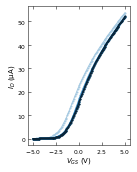

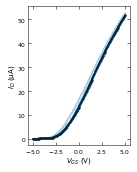

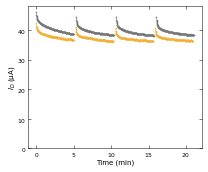

In [20]:
print(' === Figure S? === ')
color_SiNx = '#f2b134' #'#ee7539'
color_peach = '#ff8e65'
color_gray = '#777777'

# SiNx chip in air
data_air_gs   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',  'GateSweep.json',  minExperiment=84, maxExperiment=84, minRelativeIndex=0, maxRelativeIndex=float('inf'))
data_air_sb   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',  'StaticBias.json',  minExperiment=84, maxExperiment=84, minRelativeIndex=0, maxRelativeIndex=float('inf'))

# SiNx chip in vacuum probe station (5e-5 Torr)
data_vac_gs   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',  'GateSweep.json',  minExperiment=90, maxExperiment=90, minRelativeIndex=0, maxRelativeIndex=float('inf'))
data_vac_sb   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',  'StaticBias.json',  minExperiment=90, maxExperiment=90, minRelativeIndex=0, maxRelativeIndex=float('inf'))

fig1, axes1 = dpu.makeDevicePlot('TransferCurve', data_air_gs, data_air_gs[0]['Identifiers'], mode_parameters={'publication_mode':True, 'sweepDirection':'reverse', 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'enableLegend':False, 'colorsOverride':[]})
fig2, axes2 = dpu.makeDevicePlot('TransferCurve', data_vac_gs, data_vac_gs[0]['Identifiers'], mode_parameters={'publication_mode':True, 'sweepDirection':'reverse', 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'enableLegend':False, 'colorsOverride':[]})

fig3, (ax3A,ax3B,ax3C) = dpu.makeDevicePlot('StaticBias'   , data_vac_sb, data_vac_sb[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':[color_SiNx]*len(data_vac_sb), 'ylim':{'top':48}})

for deviceRun in data_air_sb:
    deviceRun['Results']['timestamps'] = np.array(deviceRun['Results']['timestamps'])/60
t0 = data_air_sb[0]['Results']['timestamps'][0]
time_offsets = [deviceRun['Results']['timestamps'][0] - t0 for deviceRun in data_air_sb]
for i in range(len(data_air_sb)):
    mplu.plotStaticBias(ax3A, data_air_sb[i], color_gray, time_offsets[i])


 === Figure S5 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7535092830657959)
Saving figures.
Figures saved. (Seconds elapsed: 0.47580528259277344)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8787651062011719)
Saving figures.
Figures saved. (Seconds elapsed: 0.5853598117828369)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-6.112063717427057, -7.465071477890704, -8.334461795712208, -7.351453543650789, -7.629668096135523, -8.51058270961355, -5.433154312332176, -6.508170529105167]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5122489929199219)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [3.095031508144395e-06, 1.7676765314817275e-06, 2.4191085064091025e-06, 4.04685268813064e-06, 1.6086239683477173e-06, 5.0760546510989575e-06, 1.8532908036158983e-06, 4.425674174226183e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5901298522949219)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [2297.5779087396295, 5169.177023244726, 7402.067616844862, 4707.274270269928, 6251.249465813373, 7233.621073209648, 2174.802129097276, 3260.347947065033]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5681190490722656)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-2.765126253868264, -1.661354006342332, -2.1940868548101418, -2.384537619706943, -0.14744094831293159, -2.405201765336453, -2.566601997131208, -2.799348660608419, -6.112063717427057, -7.465071477890704, -8.334461795712208, -7.351453543650789, -7.629668096135523, -8.51058270961355, -5.433154312332176, -6.508170529105167]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5247149467468262)
Saving figures.
Figures saved. (Seconds elapsed: 0.2626359462738037)
Plotting BoxPlotTransconductance plot.
Extracted gm: [2.8075787317050055e-06, 9.70349693412445e-07, 1.984093850651445e-06, 2.7311118310655708e-06

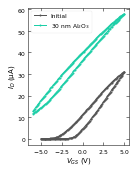

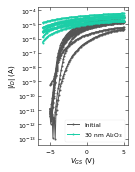

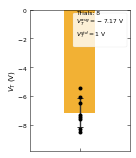

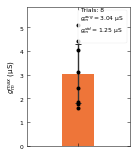

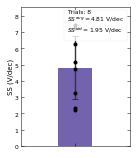

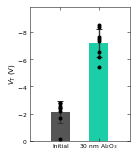

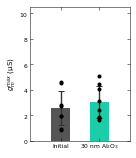

In [3]:
print(' === Figure S5 === ')

color_initial = '#555555'
color_ALD = '#1CCEA7'

data_orig_D1_32  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/1-32',  'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D5_6   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/5-6',   'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D11_12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/11-12', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D14_19 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/14-19', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D35_36 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/35-36', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D40_41 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/40-41', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D55_58 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/55-58', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D59_62 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/59-62', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig = [data_orig_D1_32[0], data_orig_D5_6[0], data_orig_D11_12[0], data_orig_D14_19[0], data_orig_D35_36[0], data_orig_D40_41[0], data_orig_D55_58[0], data_orig_D59_62[0]]

data_ALD_D1_32  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/1-32',  'GateSweep.json', minExperiment=8, maxExperiment=8, minRelativeIndex=1, maxRelativeIndex=1)
data_ALD_D5_6   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/5-6',   'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=1, maxRelativeIndex=1)
data_ALD_D11_12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/11-12', 'GateSweep.json', minExperiment=8, maxExperiment=8, minRelativeIndex=1, maxRelativeIndex=1)
data_ALD_D14_19 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/14-19', 'GateSweep.json', minExperiment=8, maxExperiment=8, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D35_36 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/35-36', 'GateSweep.json', minExperiment=11, maxExperiment=11, minRelativeIndex=1, maxRelativeIndex=1)
data_ALD_D40_41 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/40-41', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=1, maxRelativeIndex=1)
data_ALD_D55_58 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/55-58', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D59_62 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/N/59-62', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=1, maxRelativeIndex=1)
data_ALD = [data_ALD_D1_32[0], data_ALD_D5_6[0], data_ALD_D11_12[0], data_ALD_D14_19[0], data_ALD_D35_36[0], data_ALD_D40_41[0], data_ALD_D55_58[0], data_ALD_D59_62[0]]

## === Device Plots ===
#figA1, axesA1 = dpu.makeDevicePlot('TransferCurve', [data_orig_D1_32[0], data_ALD_D1_32[0]], data_orig_D1_32[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA2, axesA2 = dpu.makeDevicePlot('TransferCurve', [data_orig_D5_6[0], data_ALD_D5_6[0]], data_orig_D5_6[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA3, axesA3 = dpu.makeDevicePlot('TransferCurve', [data_orig_D11_12[0], data_ALD_D11_12[0]], data_orig_D11_12[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA4, axesA4 = dpu.makeDevicePlot('TransferCurve', [data_orig_D14_19[0], data_ALD_D14_19[0]], data_orig_D14_19[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA5, axesA5 = dpu.makeDevicePlot('TransferCurve', [data_orig_D35_36[0], data_ALD_D35_36[0]], data_orig_D35_36[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA6, axesA6 = dpu.makeDevicePlot('TransferCurve', [data_orig_D40_41[0], data_ALD_D40_41[0]], data_orig_D40_41[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
figA7, axesA7 = dpu.makeDevicePlot('TransferCurve', [data_orig_D40_41[0], data_ALD_D40_41[0]], data_orig_D40_41[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA8, axesA8 = dpu.makeDevicePlot('TransferCurve', [data_orig_D55_58[0], data_ALD_D55_58[0]], data_orig_D55_58[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})

# Add legend
ax = axesA7[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('30 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA7, 'Al2O3_30nm_typical_device')

# === Chip Plots ===
#figB1, axesB1 = dpu.makeChipPlot('ChipTransferCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB2, axesB2 = dpu.makeChipPlot('ChipTransferCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=data_ALD, specificRunChipHistory=data_ALD, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB3, axesB3 = dpu.makeChipPlot('ChipTransferCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_ALD], specificRunChipHistory=[*data_orig, *data_ALD], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB4, axesB4 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB5, axesB5 = dpu.makeChipPlot('ChipSubthresholdCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=data_ALD, specificRunChipHistory=data_ALD, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_ALD], specificRunChipHistory=[*data_orig, *data_ALD], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_ALD]*len(data_ALD)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[len(data_orig)].set_label('30 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(figB6, 'Al2O3_30nm_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('30 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD]})
axes10[0].set_ylim(top=0)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage_Al2O3_30nm')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('30 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD], 'ylim':{'top':10.5}})
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance_Al2O3_30nm')

# === Normalized gm Extraction ===
I_on_list = [15,7.5,11,15,7,16,7.5,17]
gm_list = [3.1243640994315836e-06, 1.7885682744603512e-06, 2.4634777269463134e-06, 4.101788537064898e-06, 1.617502666308231e-06, 5.083114427763095e-06, 1.8622379408667514e-06, 4.467223044410235e-06]
W_ch = [4.5,2,2.5,3.5,2,4,2,4.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
Ion_width_normalized =[I_on_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))
print('I_on normalized: ' + str(Ion_width_normalized))
print('I_on normalized mean: ' + str(np.mean(Ion_width_normalized)))
print('I_on normalized std: ' + str(np.std(Ion_width_normalized)))

 === Figure S? === 
Saving figures.
Figures saved. (Seconds elapsed: 0.7091107368469238)


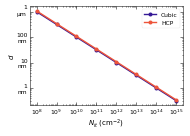

In [35]:
print(' === Figure S? === ')

color_cubic = '#351996' #['#1f77b4', '#4FB99F', '#ed553b', '#351996', '#7363af', '#ee7539']
color_hcp = '#ed553b'

mean_neighbor_distance_cubic_fn = lambda Nit: np.sqrt(1/Nit) * 0.01
mean_neighbor_distance_hcp_fn = lambda Nit: np.sqrt(1/(0.866*Nit)) * 0.01

Nit_vals = [1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15]
cubic_vals = [mean_neighbor_distance_cubic_fn(N) for N in Nit_vals]
hcp_vals = [mean_neighbor_distance_hcp_fn(N) for N in Nit_vals]

fig, ax = dpu.makeBlankPlot(figsize=(2.75,2))

ax.plot(Nit_vals, cubic_vals, marker='o', markersize='4', label='Cubic', color=color_cubic)
ax.plot(Nit_vals, hcp_vals, marker='o', markersize='4', label='HCP', color=color_hcp)
ax.legend()

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel('$d$')
ax.set_xlabel('$N_{it}$ ($\mathregular{cm^{-2}}$)')

ax.set_yticks([1e-6, 1e-7, 1e-8, 1e-9])
ax.set_yticklabels(['1\n$\mathregular{\\mu}$m', '100\nnm','10\nnm','1\nnm',])

dpu.saveExternalPlot(fig, 'Nit_Visualization')

Saving figures.
Figures saved. (Seconds elapsed: 0.3325459957122803)
Saving figures.
Figures saved. (Seconds elapsed: 0.30660295486450195)
Saving figures.
Figures saved. (Seconds elapsed: 0.31618785858154297)


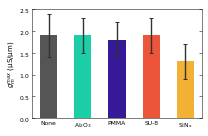

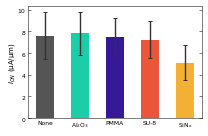

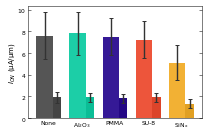

In [39]:
# Colors
color_Ambient = '#555555'
color_ALD = '#1CCEA7'
color_PMMA = '#351996'
color_SU8 = '#ed553b' 
color_SiNx = '#f2b134' 

color_Ambient_darken = '#444444'
color_ALD_darken = '#0BBD96'
color_PMMA_darken = '#240885'
color_SU8_darken = '#dc442a' 
color_SiNx_darken = '#e1a023' 

category_labels = ['None', 'Al$\\mathregular{_2}$O$\\mathregular{_3}$', 'PMMA', 'SU-8', 'SiN$\\mathregular{_x}$']

# Data from table
Ambient_Summary_Metrics = {'gm':1.9e-6, 'gm_std':0.5e-6, 'Ion':7.6e-6, 'Ion_std':2.2e-6}
ALD40nm_Summary_Metrics = {'gm':1.2e-6, 'gm_std':0.4e-6, 'Ion':4.6e-6, 'Ion_std':1.6e-6}
ALD30nm_Summary_Metrics = {'gm':1.0e-6, 'gm_std':0.2e-6, 'Ion':3.8e-6, 'Ion_std':0.3e-6}
ALD20nm_Summary_Metrics = {'gm':1.9e-6, 'gm_std':0.4e-6, 'Ion':7.8e-6, 'Ion_std':2.0e-6}
PMMA_Summary_Metrics    = {'gm':1.8e-6, 'gm_std':0.4e-6, 'Ion':7.5e-6, 'Ion_std':1.7e-6}
SU8_Summary_Metrics     = {'gm':1.9e-6, 'gm_std':0.4e-6, 'Ion':7.2e-6, 'Ion_std':1.7e-6}
SiNx_Summary_Metrics    = {'gm':1.3e-6, 'gm_std':0.4e-6, 'Ion':5.1e-6, 'Ion_std':1.6e-6}

# === Transconductance ===
fig1, ax1 = dpu.makeBlankPlot(figsize=(3,2))
yscale = 1e6
bar_width = 0.5
errorbarsize = 2
errorbarthickness = 1

ax1.bar(0, Ambient_Summary_Metrics['gm'] * yscale, yerr=Ambient_Summary_Metrics['gm_std'] * yscale, color=color_Ambient, width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
#ax1.bar(1, ALD40nm_Summary_Metrics['gm'] * yscale, yerr=ALD40nm_Summary_Metrics['gm_std'] * yscale, color=color_ALD,     width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
#ax1.bar(2, ALD30nm_Summary_Metrics['gm'] * yscale, yerr=ALD30nm_Summary_Metrics['gm_std'] * yscale, color=color_ALD,     width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax1.bar(1, ALD20nm_Summary_Metrics['gm'] * yscale, yerr=ALD20nm_Summary_Metrics['gm_std'] * yscale, color=color_ALD,     width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax1.bar(2, PMMA_Summary_Metrics['gm'] * yscale,    yerr=PMMA_Summary_Metrics['gm_std'] * yscale,    color=color_PMMA,    width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax1.bar(3, SU8_Summary_Metrics['gm'] * yscale,     yerr=SU8_Summary_Metrics['gm_std'] * yscale,     color=color_SU8,     width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax1.bar(4, SiNx_Summary_Metrics['gm'] * yscale,    yerr=SiNx_Summary_Metrics['gm_std'] * yscale,    color=color_SiNx,    width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})

ax1.tick_params('x', length=0.0, width=0.0)
ax1.set_xticks(range(len(category_labels)))
ax1.set_xticklabels(category_labels)
ax1.set_ylabel('$g_{{m}}^{{max}}$ ($\\mathregular{\\mu}$S/$\\mathregular{\\mu}$m)')

dpu.saveExternalPlot(fig1, 'Summary_Benchmark_Comparison1')

# === On-Current ===
fig2, ax2 = dpu.makeBlankPlot(figsize=(3,2))
yscale = 1e6
bar_width = 0.5
errorbarsize = 2
errorbarthickness = 1

ax2.bar(0, Ambient_Summary_Metrics['Ion'] * yscale, yerr=Ambient_Summary_Metrics['Ion_std'] * yscale, color=color_Ambient, width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
#ax2.bar(1, ALD40nm_Summary_Metrics['Ion'] * yscale, yerr=ALD40nm_Summary_Metrics['Ion_std'] * yscale, color=color_ALD,     width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
#ax2.bar(2, ALD30nm_Summary_Metrics['Ion'] * yscale, yerr=ALD30nm_Summary_Metrics['Ion_std'] * yscale, color=color_ALD,     width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax2.bar(1, ALD20nm_Summary_Metrics['Ion'] * yscale, yerr=ALD20nm_Summary_Metrics['Ion_std'] * yscale, color=color_ALD,     width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax2.bar(2, PMMA_Summary_Metrics['Ion'] * yscale,    yerr=PMMA_Summary_Metrics['Ion_std'] * yscale,    color=color_PMMA,    width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax2.bar(3, SU8_Summary_Metrics['Ion'] * yscale,     yerr=SU8_Summary_Metrics['Ion_std'] * yscale,     color=color_SU8,     width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax2.bar(4, SiNx_Summary_Metrics['Ion'] * yscale,    yerr=SiNx_Summary_Metrics['Ion_std'] * yscale,    color=color_SiNx,    width=bar_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})

ax2.tick_params('x', length=0.0, width=0.0)
ax2.set_xticks(range(len(category_labels)))
ax2.set_xticklabels(category_labels)
ax2.set_ylabel('$I_{{ON}}$ ($\\mathregular{\\mu}$A/$\\mathregular{\\mu}$m)')

dpu.saveExternalPlot(fig2, 'Summary_Benchmark_Comparison2')

# === Both ===
fig3, ax3 = dpu.makeBlankPlot(figsize=(3,2))
yscale = 1e6
bar1_width = 0.5
bar2_width = 0.25
errorbarsize = 2
errorbarthickness = 1

ax3.bar(0,     Ambient_Summary_Metrics['Ion'] * yscale, yerr=Ambient_Summary_Metrics['Ion_std'] * yscale, color=color_Ambient, width=bar1_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
#ax3.bar(1,     ALD40nm_Summary_Metrics['Ion'] * yscale, yerr=ALD40nm_Summary_Metrics['Ion_std'] * yscale, color=color_ALD,     width=bar1_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
#ax3.bar(2,     ALD30nm_Summary_Metrics['Ion'] * yscale, yerr=ALD30nm_Summary_Metrics['Ion_std'] * yscale, color=color_ALD,     width=bar1_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(1,     ALD20nm_Summary_Metrics['Ion'] * yscale, yerr=ALD20nm_Summary_Metrics['Ion_std'] * yscale, color=color_ALD,     width=bar1_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(2,     PMMA_Summary_Metrics['Ion'] * yscale,    yerr=PMMA_Summary_Metrics['Ion_std'] * yscale,    color=color_PMMA,    width=bar1_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(3,     SU8_Summary_Metrics['Ion'] * yscale,     yerr=SU8_Summary_Metrics['Ion_std'] * yscale,     color=color_SU8,     width=bar1_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(4,     SiNx_Summary_Metrics['Ion'] * yscale,    yerr=SiNx_Summary_Metrics['Ion_std'] * yscale,    color=color_SiNx,    width=bar1_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(0.375, Ambient_Summary_Metrics['gm'] * yscale, yerr=Ambient_Summary_Metrics['gm_std'] * yscale, color=color_Ambient_darken, width=bar2_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
#ax3.bar(1.375, ALD40nm_Summary_Metrics['gm'] * yscale, yerr=ALD40nm_Summary_Metrics['gm_std'] * yscale, color=color_ALD_darken,     width=bar2_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
#ax3.bar(2.375, ALD30nm_Summary_Metrics['gm'] * yscale, yerr=ALD30nm_Summary_Metrics['gm_std'] * yscale, color=color_ALD_darken,     width=bar2_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(1.375, ALD20nm_Summary_Metrics['gm'] * yscale, yerr=ALD20nm_Summary_Metrics['gm_std'] * yscale, color=color_ALD_darken,     width=bar2_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(2.375, PMMA_Summary_Metrics['gm'] * yscale,    yerr=PMMA_Summary_Metrics['gm_std'] * yscale,    color=color_PMMA_darken,    width=bar2_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(3.375, SU8_Summary_Metrics['gm'] * yscale,     yerr=SU8_Summary_Metrics['gm_std'] * yscale,     color=color_SU8_darken,     width=bar2_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})
ax3.bar(4.375, SiNx_Summary_Metrics['gm'] * yscale,    yerr=SiNx_Summary_Metrics['gm_std'] * yscale,    color=color_SiNx_darken,    width=bar2_width, capsize=errorbarsize, ecolor='#333333', error_kw={'capthick':errorbarthickness})

ax3.tick_params('x', length=0.0, width=0.0)
ax3.set_xticks([x + 0.125 for x in range(len(category_labels))])
ax3.set_xticklabels(category_labels)
ax3.set_ylabel('$I_{{ON}}$ ($\\mathregular{\\mu}$A/$\\mathregular{\\mu}$m)')

dpu.saveExternalPlot(fig3, 'Summary_Benchmark_Comparison3')
